# Assignment 5


*Please fill out the relevant cells below according to the instructions. When done, save the notebook and export it to PDF, upload both the `ipynb` and the PDF file to Canvas. For handwritten or other submissions, convert to PDF and upload the resulting document to Canvas.*

## Group Members

*Group submission with up to 3 students is highly encouraged. If you submit as part of group, list all group members with their contributions to this assignment, e.g.*

* Mark Forese (collaborated on all parts)
* Shai Slav (Collaborated on all parts)
* ...

---

## Problem 1: Game Show Strategy (3pts)

On a game show, a contestant is told the rules as follows:
> There are three doors, labelled 1, 2, 3. A single prize has been hidden behind one of them. You get to select one door. Initially your chosen door will not be opened. Instead, the game show host will open one of the other two doors, and he will do so in such a way as not to reveal the prize. For example, if you first choose door 1, he will then open one of doors 2 and 3, and it is guaranteed that he will choose which one to open so that the prize will not be revealed.
> At this point, you will be given a fresh choice of door: you can either stick with your first choice, or you can switch to the other closed door. All the doors will then be opened and you will receive whatever is behind your final choice of door.

Imagine that the contestant chooses door 1 first; then the game show host opens door 3, revealing nothing behind the door, as promised. Should the contestant (a) stick with door 1, or (b) switch to door 2, or (c) does it make no difference?

Justify your answer, either by writing code or equations with text, or both.

**Tip:** Use Bayes Theorem, enumerate all options, and think about information flow.

### Solution

This is the infamous "Monty Hall Problem."

Before a door is picked, the probability of the prize being behind any of the three doors is 1/3. This is the probability the initial pick has to work with.

Say door 1 is chosen. There is a 33.33% chance that the contestant picked the door with the prize (i.e. the prize is behind door 1) and a 66.66% chance that the prize is behind either door 2 or door 3.

Mathematically, this means our prior is:

$$bel_0(\text{prize = door 1}) \approx 0.33$$

Now, door 3 is revealed to <strong>NOT</strong> have the prize behind it. Bayes's Theorem tells us:

$$p(A | B) = \frac{p (B | A) \cdot p(A)}{p(B)}$$

where: 

* event A represents whether or not the prize is behind door 1
* event B represents another door (door 3) being opened

So we can write:

$$p(\text{prize = door 1} \, | \,\text{opened = door 3}) = \frac{p(\text{opened = door 3} \, | \, \text{prize = door 1})\cdot bel_0(\text{prize = door 1})}{p(\text{opened = door 3})}$$

If the prize is truly behind door 1, then the host can open either door 2 or door 3. Let's say he's not biased towards a particular door, so the probability that he opens door 3 in this case is 0.5.

The denominator in our equation is:

$$p(\text{opened = door 3}) = p(\text{opened = door 3 | prize = door 1}) \cdot bel_0(\text{prize = door 1}) + p(\text{opened = door 3 | prize = door 2}) \cdot bel_0(\text{prize = door 2}) + 
p(\text{opened = door 3 | prize = door 3}) \cdot bel_0(\text{prize = door 3})$$

The last term in this formula is 0, since door 3 will never be opened if the prize is behind it.  If we chose door 1, and the prize is truly behind that door, the first term evaluates to $0.5 \times 0.33$.  If the prize is actually behind door 2, however, the probability that door 3 is opened is 1, since the prize door (door 2) will not be opened and neither will the door that we picked (door 1). Thus, this term is simply $0.33$, our initial belief about door 2.

Substituting:

$$p(\text{prize = door 1}\, | \,\text{opened = door 3}) = \frac{0.5 \times 0.33}{(0.5 \times 0.33) + (0.33)}$$

In [1]:
p_pr1_op3 = ((1./2.)*(1./3.))/((1./2.)*(1./3.)+ (1./3.))
p_pr1_op3

0.3333333333333333

So, $p(\text{prize = door 1}\, | \,\text{opened = door 3}) = \frac{1}{3}$.  This means that you would be twice as likely to find the prize if you switched away from your initial choice.  **Thus, the contestant should switch to door 2, as there is now a $\frac{2}{3}$ (66.67%) chance that the prize is behind that door.**

*Seemingly, the probabilities "locked in" once the contestant chose the first door.*

## Problem 2: Central Limit Theorem (3pts)

Use `scipy.stats` to draw $N$ samples $x_i$ from the uniform and the Cauchy distribution. Confirm whether the mean $\mu=\tfrac{1}{N}\sum_i x_i$ of these samples (which is itself a RV) has a distribution $p(\mu)$ that converges to a normal distribution when $N\rightarrow\infty$.

A simple way of testing for normality of the distribution of means is the [68–95–99.7 rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule), i.e. you expect that there are only about 5% of the means (of a draw of $N$ samples) that deviate from $\mathrm{mean}(\mu)$ by more than $2 \sqrt{\mathrm{var}(\mu)}$.

Visualization can be helpful but is itself not a sufficient conformation of normality!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, cauchy


num_trials = 1000 #number of means to take

ns = np.logspace(0,6,base = 10,num = 7) #number of samples
mu_us = np.zeros((num_trials,7)) #uniform sample mean array

mu_cs = np.zeros((num_trials,7)) #cauchy sample mean array

for j in range(len(ns)): #for a bunch of values of N
    N = int(ns[j])
    
    for i in range(num_trials): #N samples and take the mean. We will get num_trials means for each N
        u = uniform.rvs(size = N)
        mu_u = np.mean(u)
        mu_us[i,j] = mu_u
        
        c = cauchy.rvs(size = N)
        mu_c = np.mean(c)
        mu_cs[i,j] = mu_c
        
    #mu_u_mu[j] = np.mean(mu_us[:,j])
    #mu_u_var[j] = np.mean(mu_us[:,j])
    
    #mu_c_mu[j] = np.mean(mu_cs[:,j])
    #mu_c_var[j] = np.mean(mu_cs[:,j])

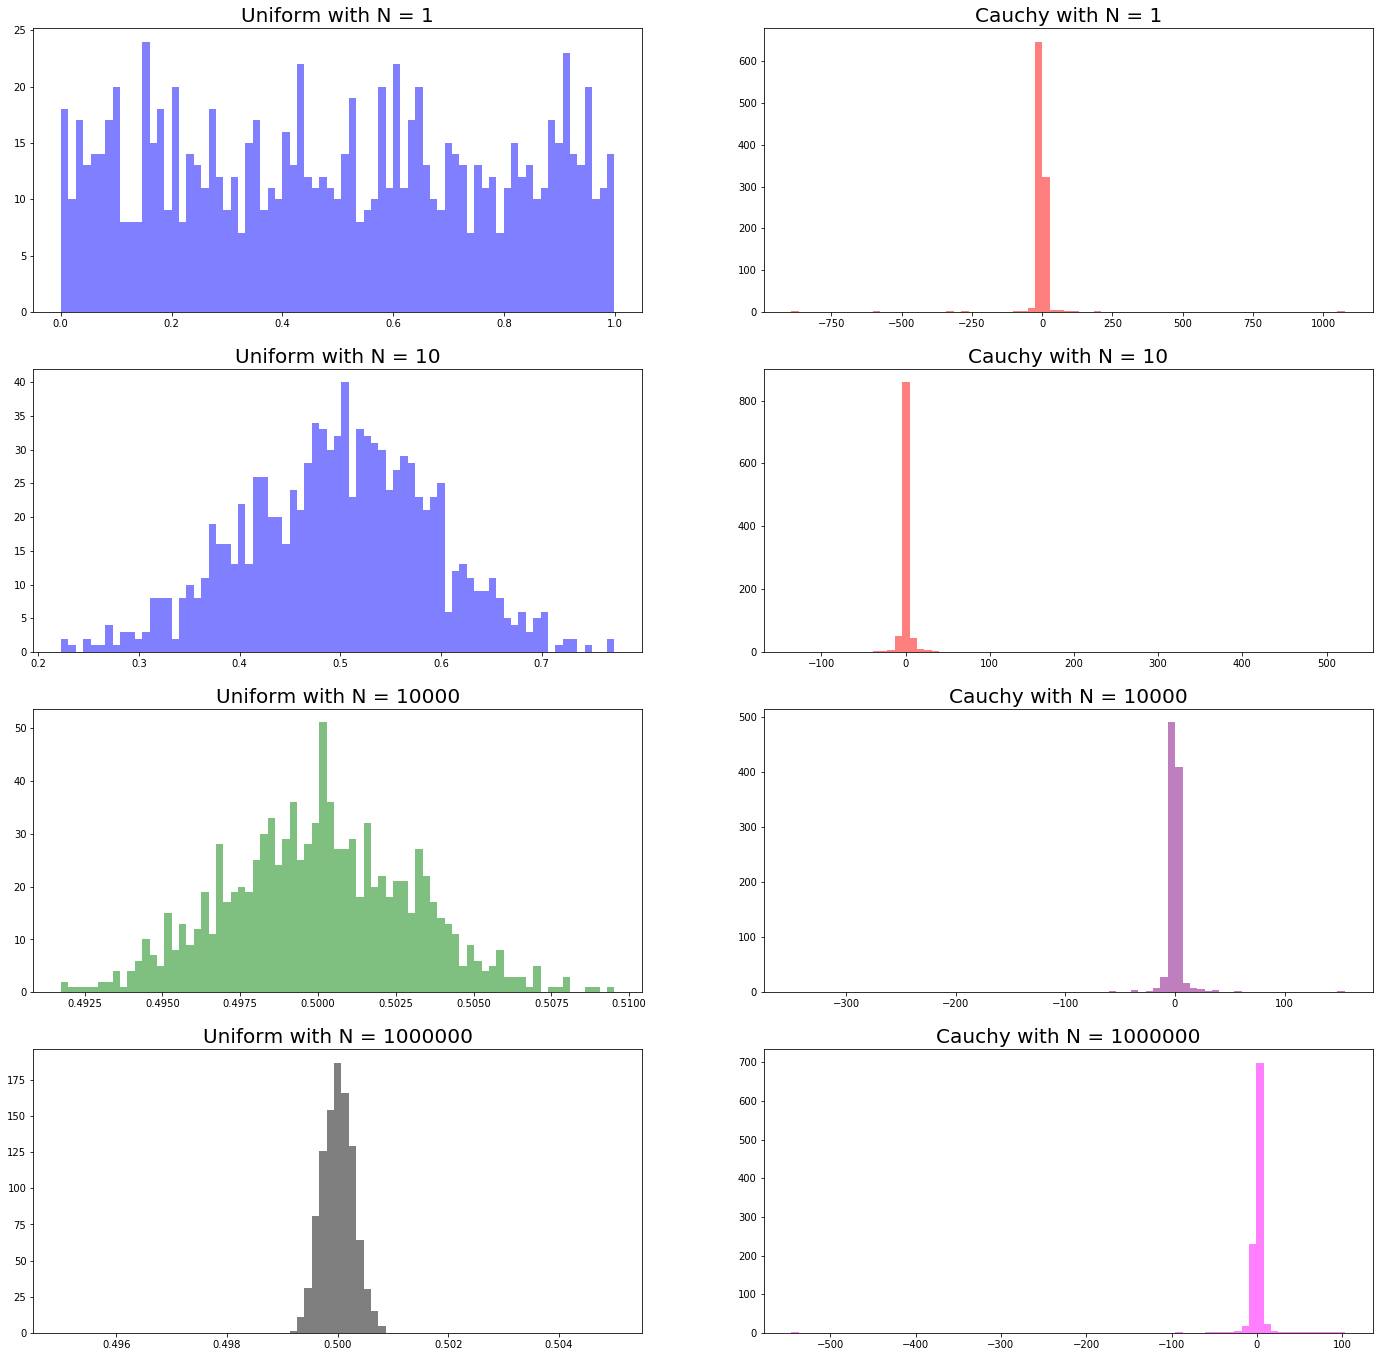

In [3]:
fig, axs = plt.subplots(nrows = 4,ncols = 2,figsize = (24,24))
nbins = 75

axs[0,0].hist(mu_us[:,0],label = 'Uniform 10',alpha = 0.5,color = 'b',bins = nbins)
axs[0,0].set_title('Uniform with N = 1',fontsize = 20)

axs[0,1].hist(mu_cs[:,0],label = 'Cauchy 10',alpha = 0.5,color = 'r',bins = nbins)
axs[0,1].set_title('Cauchy with N = 1',fontsize = 20)

axs[1,0].hist(mu_us[:,1],label = 'Uniform 10',alpha = 0.5,color = 'b',bins = nbins)
axs[1,0].set_title('Uniform with N = 10',fontsize = 20)

axs[1,1].hist(mu_cs[:,1],label = 'Cauchy 10',alpha = 0.5,color = 'r',bins = nbins)
axs[1,1].set_title('Cauchy with N = 10',fontsize = 20)

axs[2,0].hist(mu_us[:,4],label = 'Uniform 10,000',alpha = 0.5,color = 'g',bins = nbins)
axs[2,0].set_title('Uniform with N = 10000',fontsize = 20)

axs[2,1].hist(mu_cs[:,4],label = 'Cauchy 10,000',alpha = 0.5,color = 'purple',bins = nbins)
axs[2,1].set_title('Cauchy with N = 10000',fontsize = 20)
    
axs[3,0].hist(mu_us[:,6],label = 'Uniform 1,000,000',alpha = 0.5,color = 'k',bins = nbins,range =(0.495,0.505))
axs[3,0].set_title('Uniform with N = 1000000',fontsize = 20)

axs[3,1].hist(mu_cs[:,6],label = 'Cauchy 1,000,000',alpha = 0.5,color = 'magenta',bins = nbins)
axs[3,1].set_title('Cauchy with N = 1000000',fontsize = 20)
              
#fig.legend()
plt.show()

In [4]:
def prop_in_range(dist,num_sigma=1):
    '''Tells you how much of your distribution lies within +- num_sigma standard devations
    
    Parameters:
    dist: array. values in your distribution
    
    num_sigma: int, optional (default 1). Number of sigmas to as the function about. e.g. num_sigma = 2 
    will return the proportion of values in your array that lie within +- two standard devations from the mean.
    
    Return:
    
    prop: float (0-1), proportion of samples within the desired range
    '''
    mean = np.mean(dist)
    size = len(dist)
    var = np.var(dist)
    stdev = np.sqrt(var)
    
    upper = mean + num_sigma*stdev
    lower = mean - num_sigma*stdev
    
    in_range_counter = [1 for x in dist if ((x < upper) and (x > lower))]
    prop = sum(in_range_counter)/size
    
    return prop

In [5]:
print('UNIFORM')
print()
for i in range(len(ns)):
    print('For N = {N}:'.format(N = int(ns[i])))
    
    one_sig = prop_in_range(mu_us[:,i],num_sigma = 1)
    two_sig = prop_in_range(mu_us[:,i],num_sigma = 2)
    three_sig = prop_in_range(mu_us[:,i],num_sigma = 3)
    
    print(r'1 sigma: {:.4f}'.format(one_sig))
    print(r'2 sigma: {:.4f}'.format(two_sig))
    print(r'3 sigma: {:.4f}'.format(three_sig))
    print()
    
print('CAUCHY')
print()
for i in range(len(ns)):
    print('For N = {N}:'.format(N = int(ns[i])))
    
    one_sig = prop_in_range(mu_cs[:,i],num_sigma = 1)
    two_sig = prop_in_range(mu_cs[:,i],num_sigma = 2)
    three_sig = prop_in_range(mu_cs[:,i],num_sigma = 3)
    
    print(r'1 sigma: {:.4f}'.format(one_sig))
    print(r'2 sigma: {:.4f}'.format(two_sig))
    print(r'3 sigma: {:.4f}'.format(three_sig))
    print()
    


UNIFORM

For N = 1:
1 sigma: 0.5690
2 sigma: 1.0000
3 sigma: 1.0000

For N = 10:
1 sigma: 0.6800
2 sigma: 0.9560
3 sigma: 1.0000

For N = 100:
1 sigma: 0.6570
2 sigma: 0.9640
3 sigma: 0.9990

For N = 1000:
1 sigma: 0.6840
2 sigma: 0.9520
3 sigma: 0.9970

For N = 10000:
1 sigma: 0.6590
2 sigma: 0.9590
3 sigma: 0.9980

For N = 100000:
1 sigma: 0.6750
2 sigma: 0.9630
3 sigma: 0.9990

For N = 1000000:
1 sigma: 0.6710
2 sigma: 0.9530
3 sigma: 1.0000

CAUCHY

For N = 1:
1 sigma: 0.9820
2 sigma: 0.9920
3 sigma: 0.9940

For N = 10:
1 sigma: 0.9780
2 sigma: 0.9890
3 sigma: 0.9930

For N = 100:
1 sigma: 0.9840
2 sigma: 0.9940
3 sigma: 0.9980

For N = 1000:
1 sigma: 0.9950
2 sigma: 0.9960
3 sigma: 0.9960

For N = 10000:
1 sigma: 0.9610
2 sigma: 0.9820
3 sigma: 0.9880

For N = 100000:
1 sigma: 0.9800
2 sigma: 0.9890
3 sigma: 0.9910

For N = 1000000:
1 sigma: 0.9740
2 sigma: 0.9870
3 sigma: 0.9920



Using the criteria for normality with the 68-95-99.7 rule, we can see that the central limit theorem applies to uniform distributions; as we increase the number of samples (N), the percentage of values falling within one, two, and three standard deviations approaches 0.68, 0.95, and 0.99, respectively. This also agrees with the shapes of the plots of the distribution, which appear more normal as N increases (thus adhering to the central limit theorem). The Cauchy distribution, on the other hand, does not approach a normal distribution as we increse the sample size and therefore does not follow the central limit theorem - as can be seen visually both from the plots of its distributions across different samples sizes and percentage of values wihtin different standard deviations.

## Problem 3: Hubble was no Bayesian (14pts)

...but you can be!

In 1929, Edwin Hubble published a seminal [paper](http://www.pnas.org/content/pnas/15/3/168.full.pdf), in which he compared the radial velocity of astronomical objects (i.e. how fast these objects move towards or away from us) with their distance. The former can be done pretty precisely with spectroscopy, the latter is much more uncertain. His original data are available [here](https://github.com/pmelchior/usrp-sciprog/blob/master/day3/table1.txt).

He saw that the velocity increases with distance and speculated that this could be the sign of a cosmological expansion. This lead cosmologist to believe in the Big Bang theory.

### Step 0 (1pt):

Load the data into an array with `numpy.genfromtxt`, make use of its arguments `names` and `dtype` to read in the column names from the header and choosing the data type on its own as needed. You should get 6 columns
   * `CAT`, `NUMBER`:  These two combined give you the name of the galaxy.
   * `R`: distance in Mpc
   * `V`: radial velocity in km/s
   * `RA`, `DEC`: equatorial coordinates of the galaxy
   
Make a scatter plot of $R$ vs $V$. Don't forget labels and units...

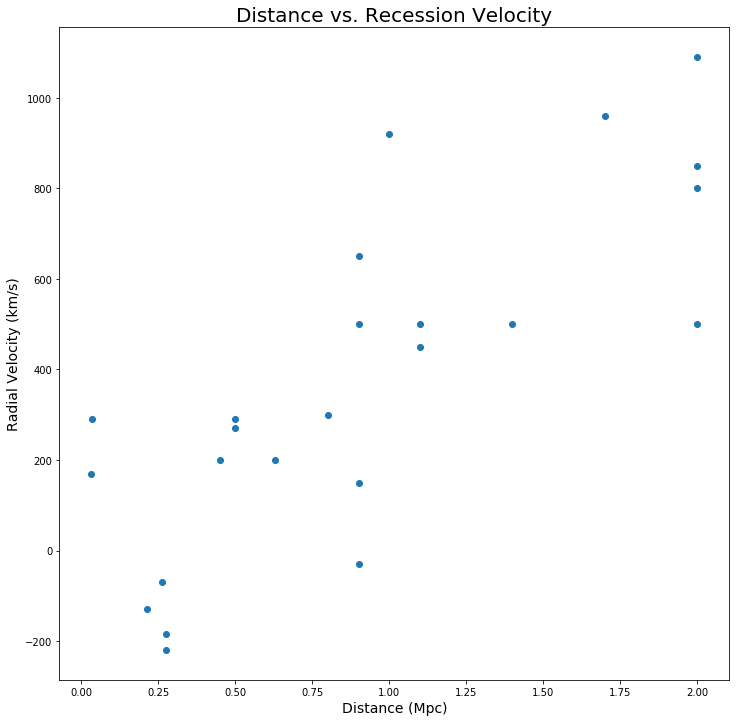

In [6]:
D = np.genfromtxt('./table1.txt',names = True,dtype = None,encoding=None)

plt.figure(figsize=(12,12))
plt.scatter(D['R'],D['V'])
plt.xlabel('Distance (Mpc)',fontsize = 14)
plt.ylabel('Radial Velocity (km/s)',fontsize = 14)
plt.title('Distance vs. Recession Velocity',fontsize = 20)
plt.show()

### Step 1 (2pts):

Use linear regression to determine the MLE of the slope $a$ for the line $R=a V$. Note that this is plot is flipped compared to the usual way of plotting a Hubble diagram (why are we doing that?).

This is a linear model **with no intercept**. Print the MLE. Then, create a new version of the scatter plot by adding the MLE line.

**Tip:** You don't need measurement uncertainties (there aren't any in Hubble's data) to determine the MLE.

The slope, a = 423.937


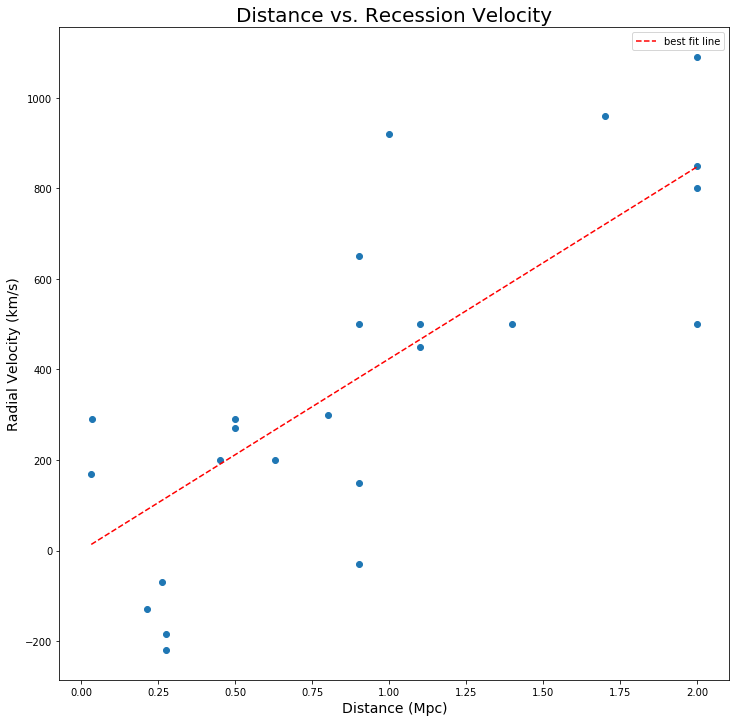

In [7]:
N = len(D)
X = D['R'].reshape((N,1))
Y = D['V']

params, I_, dont_, care_ = np.linalg.lstsq(X,Y,rcond=None) #I_,dont_,and care_ are just names im giving return 
#vals i don't care about

H_0 = params[0] #params is an array, so im just getting the only element

print('The slope, a = {:.3f}'.format(H_0))

plt.figure(figsize=(12,12))
plt.scatter(X,Y)
plt.plot(X,H_0*X,linestyle = '--',color = 'r',label = 'best fit line')
plt.xlabel('Distance (Mpc)',fontsize = 14)
plt.ylabel('Radial Velocity (km/s)',fontsize = 14)
plt.title('Distance vs. Recession Velocity',fontsize = 20)

plt.legend()
plt.show()

### Step 2 (3pts):

The full Gaussian likelihood of the linear regression problem has a term for the slope $a$, intercept $b$, and *uncertainty* $\sigma$ of $R$. In matrix form, it reads as:

$$
p(\mathcal{D}\mid a,b,\sigma) =  -\frac{1}{2}\left[N\,\ln(2\pi) 
    + \ln|\boldsymbol{\Sigma}|
    + \left(\mathbf{y} - \mathbf{X}\,\boldsymbol{\theta}\right)^\mathsf{T} \, 
      \boldsymbol{\Sigma}^{-1} \,
      \left(\mathbf{y} - \mathbf{X}\,\boldsymbol{\theta}\right)
\right]
$$

We will assume that the uncertainties of all data points are identical, which means that the 2nd terms simplifies to $\ln|\boldsymbol{\Sigma}|\rightarrow 2 N\ln(\sigma)$. Adopt the following priors for all of the parameters $\theta=(a,b,\sigma)$:

$$
\begin{align}
&p(a) \propto (1+a^2)^{-3/2}\\
&p(b) \propto 1\\
&p(\sigma) \propto 1/\sigma\\
\end{align}
$$

These are called **maximally uniformative** priors (note that they are not all flat).

This is a non-linear inference problem. Find the maximum of the posterior $p(a,b,\sigma\mid\mathcal{D}) \propto p(\mathcal{D}\mid a,b,\sigma)\,p(a,b,\sigma)$ with `scipy.optimize.minimize`.

**Tip:** Make use of the MLE for $a$ and guess reasonable values for $b$ and $\sigma$.

In [8]:
def log_like(D,params):
    N = len(D)
    #print(D)
    x = D['R'] #x values
    y = D['V'] #true y values
    
    a,b,log_sigma = params
    sigma=np.exp(log_sigma)
    
    return -0.5*(N*np.log(2*np.pi) + 2*N*np.log(sigma) + ((y - (x*a+b))@(y - (x*a+b)).T)/sigma**(2))

def log_prior(params):
    a,b,log_sigma = params
    sigma=np.exp(log_sigma)
    
    log_prior_a = (1+a**2)**-1.5
    log_prior_b = 1
    log_prior_sig = 1/sigma
    
    #Should this be times or plus?
    return log_prior_a+log_prior_b+log_prior_sig #this assumes that the three parameters are independent. 

def neg_log_post(params,D):
    return -(log_like(D,params)+log_prior(params))


from scipy.optimize import minimize

params = [423,-20,np.log(5)]
result = minimize(neg_log_post,x0=params, args=(D,))
print(result)
print()
print('The maximum of the posterior is {:.2f}. The optimization yielded a = {:.2f},b = {:.2f}, and log_sigma = {:.2f}'\
      .format(result.fun,*result.x))

      fun: 162.82162341505932
 hess_inv: array([[ 7.41282697e+03, -6.64249507e+03,  2.75059782e-01],
       [-6.64249507e+03,  7.18992016e+03, -1.93598618e-01],
       [ 2.75059782e-01, -1.93598618e-01,  1.97399093e-02]])
      jac: array([ 0.00000000e+00,  0.00000000e+00, -9.53674316e-06])
  message: 'Optimization terminated successfully.'
     nfev: 235
      nit: 45
     njev: 47
   status: 0
  success: True
        x: array([454.15501299, -40.7803121 ,   5.40705569])

The maximum of the posterior is 162.82. The optimization yielded a = 454.16,b = -40.78, and log_sigma = 5.41


In [9]:
np.exp(result.x[2])

222.97411472714427

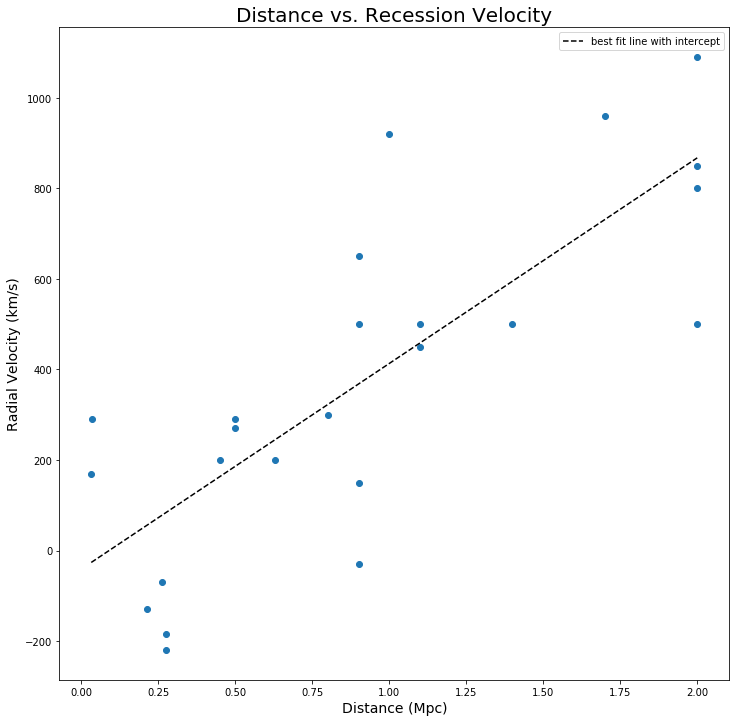

In [10]:
a = result.x[0]
b = result.x[1]

plt.figure(figsize=(12,12))
plt.scatter(X,Y)
plt.plot(X,a*X+b,linestyle = '--',color = 'k',label = 'best fit line with intercept')
plt.xlabel('Distance (Mpc)',fontsize = 14)
plt.ylabel('Radial Velocity (km/s)',fontsize = 14)
plt.title('Distance vs. Recession Velocity',fontsize = 20)

plt.legend()
plt.show()

In [11]:
print(r'With no intercept, H_0 = {h:.2f}. With the intercept, H_0 = {a:.2f}'.format(h=H_0,a =a))

With no intercept, H_0 = 423.94. With the intercept, H_0 = 454.16


### Step 3 (3pts):

We don't have any error estimates for the posterior, but we can at least visualize it. Compute $p(a,b,\sigma\mid\mathcal{D})$ on a reasonably fine grid of $(a,b,\sigma)$, picking suitable limits for every parameter. We don't really care about the errors on $R$, so marginalize out $\sigma$. Plot the log posterior for the remaining parameters $(a,b)$ as an image.

**Tip:** The function `scipy.special.logsumexp` is useful.

In [19]:
from scipy.special import logsumexp


a_arr = np.linspace(430,450,num = 25)
b_arr = np.linspace(-50,-30,num = 25)
sig_arr = np.linspace(np.log(24800),np.log(24900),num=25)
#sigma = 24872 #from the first run

#aa,bb = np.meshgrid(a_arr,b_arr)

res_arr = np.zeros((len(a_arr),len(b_arr),len(sig_arr)))

for i in range(len(a_arr)):
    print(i)
    for j in range(len(b_arr)):
        for k in range(len(sig_arr)):
            res = minimize(neg_log_post,x0 = [a_arr[i],b_arr[j],sig_arr[k]],args=(D,))
            res_arr[i,j,k] = res.fun

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


KeyboardInterrupt: 

In [ ]:
fig = plt.figure(figsize = (12,12))

im = plt.imshow(logsumexp(res_arr,axis=-1))
cbar = fig.colorbar(im)
cbar.set_label('Posterior',fontsize = 13)

plt.title('Posterior as a function of a_0 and b_0',fontsize = 20)
plt.xlabel('a',fontsize = 14)
plt.ylabel('b',fontsize =14 )
plt.show()

### Step 4 (3pts):

Step 3 is quite tedious. Let's hit this problem with a larger hammer, namely the [MCMC Hammer](https://emcee.readthedocs.io/en/stable/).

Perform MCMC inference of $p(a,b,\sigma\mid\mathcal{D})$ as in steps 2 and 3, but with `emcee`. When done, draw a number of samples from the posterior, and visualize them with [`corner`](http://corner.readthedocs.io/).

In [15]:
import emcee
params = [450,-40,np.log(24900)]

# create a small ball around the MLE  initialize each walker
nwalkers, ndim = 30, 3
pos = params + 1e-3 * np.random.randn(nwalkers, ndim)

# run emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, neg_log_post, args=(arr,))
sampler.run_mcmc(pos, 5000, progress=True);

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-8-3819755aeb79>:11: RuntimeWarning: invalid value encountered in log
  return -0.5*(N*np.log(2*np.pi) + 2*N*np.log(sigma) + ((y - (x*a+b))@(y - (x*a+b)).T)/sigma)
  1%|          | 32/5000 [00:00<00:05, 840.91it/s]


ValueError: Probability function returned NaN

### Step 5 (1pt):

Sample from the posterior predictive distribution $p(R \mid V, \mathcal{D})$ by drawing samples from the posterior $p(a,b,\sigma\mid\mathcal{D})$ and predicting a linear relation for unseen data $R(V)$.
Create a final version of the scatter plot by adding the lines that correspond to these posterior draws.

**Tip:** When plotting, set the transparency `alpha` to values < 1, so that we can distinguish regions where the posterior predictive is more certain from those where it less certain.

### Step 6 (1pt):

With some simplification, $a$ can be interpreted as the age of the universe. Compare your MAP estimate of $a$ with the modern estimate of the age of the universe $A$.

Make a marginal plot for $p(a\mid\mathcal{D})$ from your `emcee` samples, add the age $A$ of the universe as a vertical line, and describe whether $A$ seems consistent with the data and the model assumptions.

**Tip:** `astropy.units` are helpful.